In [17]:
import numpy as np
import matplotlib.pyplot as plt

class Simulation(object):
    def __init__(self, L=400, nx=1000, dt=0.001, tau=1, D=0.00000001):
        """
        :param L: float, length of box
        :param nx: int, number of grid points
        :param dt: float, time step
        :param tau: float, tau
        :param D: float, diffusion coefficient
        all units are under IS.
        """
        self.L = L
        self.n = nx
        self.x = np.linspace(0, L, nx)
        #self.c = 1.*self.gaussian(self.x, 0.0, 10.)
        self.c = np.zeros(self.n) # c(t=0)
        self.c0 = self.c.copy()
        self.dt = dt
        self.dx = self.x[1] - self.x[0]
        self.tau = tau
        self.D = D
        self.lumin = np.array([])

    def gaussian(self, x, mu, sig):
        return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.square((x - mu)/sig)/2)

    def set_f(self):
        """
        set the source term
        """
        self.f = 1e-6*self.gaussian(self.x, 0.0, 10.) 
        #self.f = 1e-6*1/self.x

    def calc_diffusion(self):
        """
        calculate the diffuion term
        return D*\lapacian c
        """
        xdc = np.gradient(self.c, self.x, edge_order=2)
        xdc2 = np.gradient(xdc, self.x, edge_order=2)
        return self.D*xdc2

    def calc_lumin(self):
        """
        calculate the luminescence term
        return -1/tau*c
        """
        return -1./self.tau*self.c

    def update(self, step):
        """
        :param step: int, time step
        updating c for one time step,
        adding up 3 terms (diffusion, lumin, source)
        """
        print("step: {}".format(step))
        print("diffusion: {}".format(self.calc_diffusion()[:10]))
        print("lumin: {}".format(self.calc_lumin()[:10]))
        print("source: {}".format(self.f[:10]))
        print("c: {}".format(self.c[:10]))
        print("-"*60)
        c_lumin = self.calc_lumin()
        c_lumin_int = -np.trapz(self.calc_lumin(), self.x)
        self.c += self.dt*(self.calc_diffusion() + c_lumin + self.f)
        self.lumin = np.append(self.lumin, c_lumin_int)
        # self.c += self.dt*self.calc_diffusion()

    def run(self, nt=100):
        self.set_f()
        for step in range(nt):
            self.update(step)
        plt.plot(self.x, self.c) 
        #plt.plot(self.x, self.f)
        #plt.plot(self.x, self.c0) 
        #plt.plot(self.lumin)
        plt.show()

step: 0
diffusion: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lumin: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.96074500e-08
 3.93858264e-08 3.91027029e-08 3.87594256e-08 3.83576173e-08
 3.78991657e-08 3.73862077e-08]
c: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------------------------
step: 1
diffusion: [-3.98540985e-21 -3.97107671e-21 -3.94486299e-21 -3.89743543e-21
 -3.83156739e-21 -3.74778229e-21 -3.64674304e-21 -3.52924474e-21
 -3.39620586e-21 -3.24865826e-21]
lumin: [-3.98942280e-11 -3.98622615e-11 -3.97665157e-11 -3.96074500e-11
 -3.93858264e-11 -3.91027029e-11 -3.87594256e-11 -3.83576173e-11
 -3.78991657e-11 -3.73862077e-11]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.96074500e-08
 3.93858264e-08 3.91027029e-08 3.87594256e-08 3.83576173e-08
 3.78991657e-08 3.73862077e-08]
c: [3.98942280e-11 3.98622615e-11 3.97665157e-11 3.96074500e-11
 3.93858264e-11 3.91027029e-11 3.87594256e-11 3.83576173e-11
 

------------------------------------------------------------
step: 28
diffusion: [-1.10097966e-19 -1.09702009e-19 -1.08977849e-19 -1.07667650e-19
 -1.05848029e-19 -1.03533444e-19 -1.00742209e-19 -9.74962880e-20
 -9.38210550e-20 -8.97450148e-20]
lumin: [-1.10208825e-09 -1.10120516e-09 -1.09856016e-09 -1.09416593e-09
 -1.08804352e-09 -1.08022216e-09 -1.07073904e-09 -1.05963898e-09
 -1.04697414e-09 -1.03280354e-09]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.96074500e-08
 3.93858264e-08 3.91027029e-08 3.87594256e-08 3.83576173e-08
 3.78991657e-08 3.73862077e-08]
c: [1.10208825e-09 1.10120516e-09 1.09856016e-09 1.09416593e-09
 1.08804352e-09 1.08022216e-09 1.07073904e-09 1.05963898e-09
 1.04697414e-09 1.03280354e-09]
------------------------------------------------------------
step: 29
diffusion: [-1.13973278e-19 -1.13563384e-19 -1.12813734e-19 -1.11457418e-19
 -1.09573748e-19 -1.07177693e-19 -1.04288210e-19 -1.00928036e-19
 -9.71234398e-20 -9.29039280e-20]
lumin: [-1.14088039e

 -1.78618322e-19 -1.70858278e-19]
lumin: [-2.09817672e-09 -2.09649549e-09 -2.09145988e-09 -2.08309406e-09
 -2.07143810e-09 -2.05654765e-09 -2.03849349e-09 -2.01736100e-09
 -1.99324943e-09 -1.96627117e-09]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.96074500e-08
 3.93858264e-08 3.91027029e-08 3.87594256e-08 3.83576173e-08
 3.78991657e-08 3.73862077e-08]
c: [2.09817672e-09 2.09649549e-09 2.09145988e-09 2.08309406e-09
 2.07143810e-09 2.05654765e-09 2.03849349e-09 2.01736100e-09
 1.99324943e-09 1.96627117e-09]
------------------------------------------------------------
step: 55
diffusion: [-2.13382420e-19 -2.12615011e-19 -2.11211505e-19 -2.08672191e-19
 -2.05145557e-19 -2.00659627e-19 -1.95249895e-19 -1.88958930e-19
 -1.81835909e-19 -1.73936078e-19]
lumin: [-2.13597277e-09 -2.13426126e-09 -2.12913493e-09 -2.12061841e-09
 -2.10875249e-09 -2.09359380e-09 -2.07521443e-09 -2.05370125e-09
 -2.02915534e-09 -2.00169111e-09]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.9607

step: 77
diffusion: [-2.95501466e-19 -2.94438724e-19 -2.92495086e-19 -2.88978532e-19
 -2.84094692e-19 -2.77882377e-19 -2.70390740e-19 -2.61678732e-19
 -2.51814456e-19 -2.40874418e-19]
lumin: [-2.95799010e-09 -2.95561992e-09 -2.94852076e-09 -2.93672671e-09
 -2.92029424e-09 -2.89930182e-09 -2.87384924e-09 -2.84405685e-09
 -2.81006458e-09 -2.77203089e-09]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.96074500e-08
 3.93858264e-08 3.91027029e-08 3.87594256e-08 3.83576173e-08
 3.78991657e-08 3.73862077e-08]
c: [2.95799010e-09 2.95561992e-09 2.94852076e-09 2.93672671e-09
 2.92029424e-09 2.89930182e-09 2.87384924e-09 2.84405685e-09
 2.81006458e-09 2.77203089e-09]
------------------------------------------------------------
step: 78
diffusion: [-2.99191375e-19 -2.98115362e-19 -2.96147454e-19 -2.92586988e-19
 -2.87642165e-19 -2.81352277e-19 -2.73767092e-19 -2.64946298e-19
 -2.54958847e-19 -2.43882202e-19]
lumin: [-2.99492634e-09 -2.99252656e-09 -2.98533876e-09 -2.97339743e-09
 -2.95675

 3.78991657e-08 3.73862077e-08]
c: [3.72594339e-09 3.72295786e-09 3.71401563e-09 3.69915960e-09
 3.67846094e-09 3.65201847e-09 3.61995789e-09 3.58243079e-09
 3.53961345e-09 3.49170545e-09]
------------------------------------------------------------
step: 99
diffusion: [-3.75832737e-19 -3.74481092e-19 -3.72009081e-19 -3.67536561e-19
 -3.61325062e-19 -3.53423947e-19 -3.43895728e-19 -3.32815384e-19
 -3.20269531e-19 -3.06355475e-19]
lumin: [-3.76211168e-09 -3.75909717e-09 -3.75006813e-09 -3.73506789e-09
 -3.71416830e-09 -3.68746915e-09 -3.65509736e-09 -3.61720598e-09
 -3.57397300e-09 -3.52559995e-09]
source: [3.98942280e-08 3.98622615e-08 3.97665157e-08 3.96074500e-08
 3.93858264e-08 3.91027029e-08 3.87594256e-08 3.83576173e-08
 3.78991657e-08 3.73862077e-08]
c: [3.76211168e-09 3.75909717e-09 3.75006813e-09 3.73506789e-09
 3.71416830e-09 3.68746915e-09 3.65509736e-09 3.61720598e-09
 3.57397300e-09 3.52559995e-09]
------------------------------------------------------------


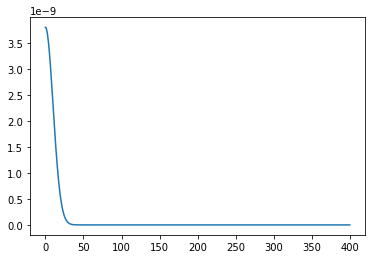

In [18]:
simul = Simulation()
simul.run()

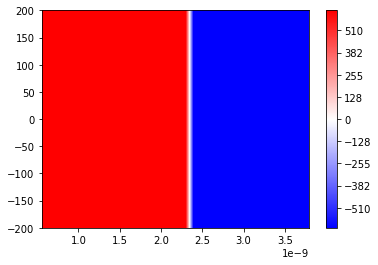

In [19]:
y = np.linspace(-200,200,400)
X, Y = np.meshgrid(simul.c, y)
Z = np.square(X-25)# (X-25)^2
Z[:, :25] = -Z[:, :25]
plt.contourf(X[:, :50], Y[:, :50], Z[:, :50], 500, cmap = 'bwr')
plt.colorbar();